In [11]:
# 1. Environment Setup & Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.datasets import make_blobs, load_breast_cancer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


# Configuration for Reproducibility
# Setting seeds ensures that experiments are repeatable with the same results

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

## 1. Baseline Experiment: Linear Classification

In this section, we generate a synthetic, linearly separable dataset using `make_blobs`. The goal is to verify the performance of a **Single-Neuron Architecture** (which acts as a Logistic Regression classifier).

We expect high accuracy and a clear linear decision boundary separating the two classes.

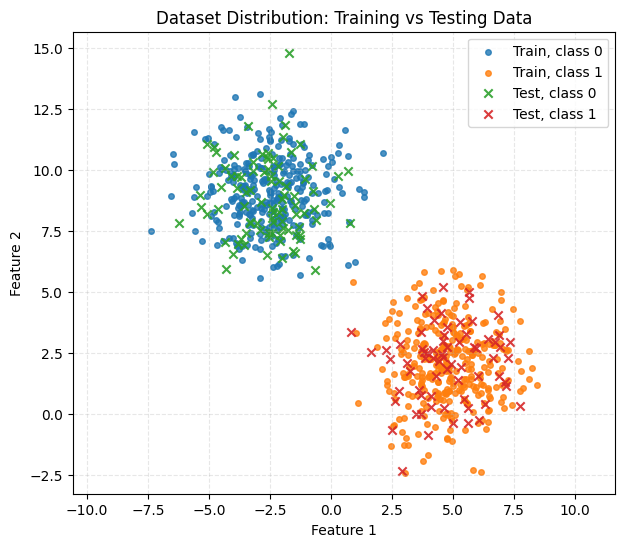

Training data:
Loss: 0.0021158012095838785, test accuracy: 0.998
Testing data:
Loss: 0.0023817827459424734, test accuracy: 0.994


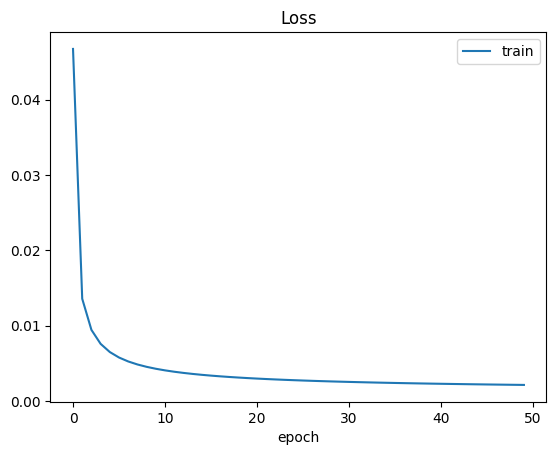

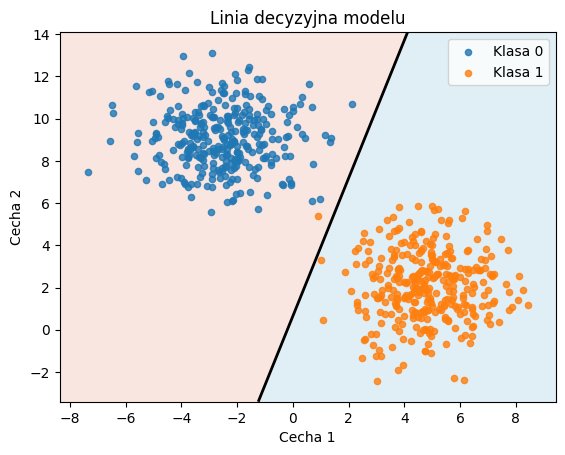

In [12]:
# 2. Data Generation & Preprocessing

# Generating a synthetic dataset for binary classification (2 blobs)
# n_samples=800: Total number of points
# centers=2: Binary classification (Class 0 and Class 1)
# cluster_std=1.5: Adds some noise/overlap to make it realistic
X, y = make_blobs(n_samples=800, centers=2, n_features=2,
cluster_std=1.5, random_state=SEED)

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)

plt.figure(figsize=(7, 6))

# Plotting Training Data
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train, class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train, class 1')

# Plotting Testing Data
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test, class 0')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test, class 1')

plt.title('Dataset Distribution: Training vs Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



# 3. Model Architecture (Single Neuron)

# Defining a simple Sequential model
# Using a single Dense layer with sigmoid activation acts as Logistic Regression
model = keras.Sequential([
layers.Input(shape=(2,)),
layers.Dense(1, activation='sigmoid')
])

# Compiling the model
# Optimizer: Stochastic Gradient Descent (SGD)
# Loss function: Mean Squared Error (MSE)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
loss='mse', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)

# 4. Model Evaluation
print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()


# 5. Decision Boundary Visualization

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)
)

# Predict across the entire grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points, verbose=0)
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='RdBu')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20,
alpha=0.8, label='Klasa 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20,
alpha=0.8, label='Klasa 1')
plt.title("Linia decyzyjna modelu")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.legend()
plt.show()



## 2. Testing Linear Model Limitations (Multi-modal Data)
In the previous experiment, the single-neuron model performed well on linearly separable data. Now, we introduce a **more complex dataset** consisting of 4 clusters merged into 2 binary classes.

**Objective:** To verify if a simple linear classifier (Perceptron) can effectively solve a problem where the decision boundary might need to be non-linear (e.g., the XOR problem).

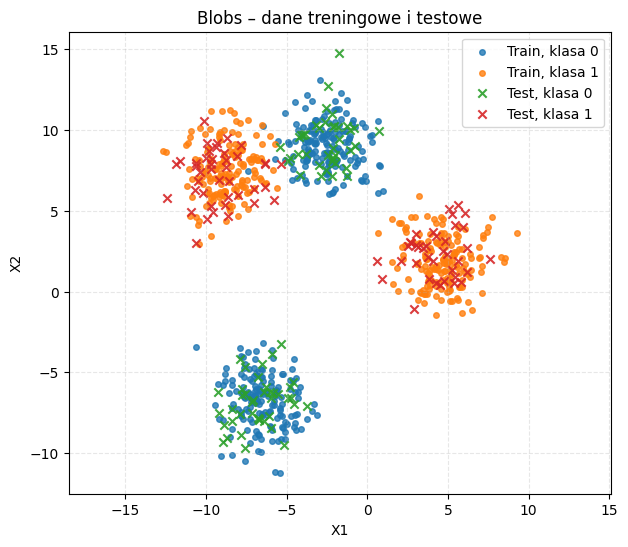

Training data:
Loss: 0.2214161604642868, test accuracy: 0.538
Testing data:
Loss: 0.22844652831554413, test accuracy: 0.512


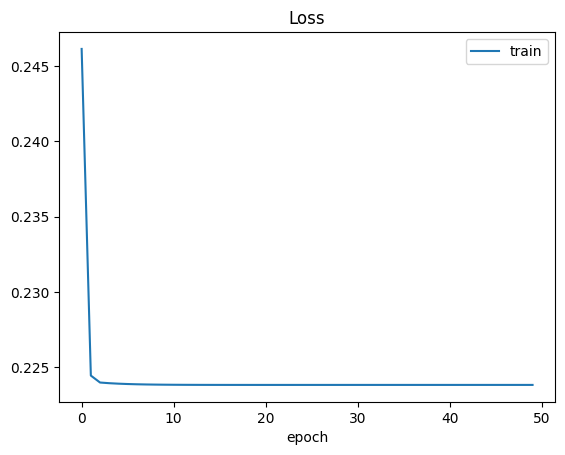

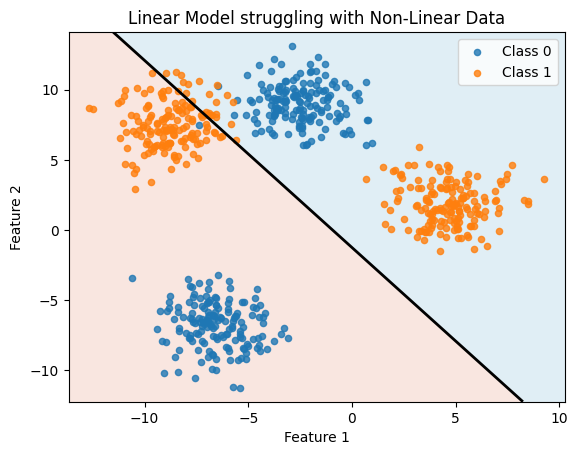

In [13]:
# Data Generation: Complex Non-Linear Distribution

# Generating dataset with 4 centers (clusters)
X, y = make_blobs(n_samples=800, centers=4, n_features=2,
cluster_std=1.5, random_state=SEED)

# Merging 4 clusters into 2 classes to create complexity
# This often creates a dataset that is NOT linearly separable
y[y == 2] = 0
y[y == 3] = 1

# Splitting into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)

# Visualization of the complex dataset
plt.figure(figsize=(7, 6))
# train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train, klasa 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train, klasa 1')
# test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test, klasa 0')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test, klasa 1')

plt.title('Blobs – dane treningowe i testowe')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Model Training (Same Architecture)

# We use the SAME simple architecture to show its limitations
model = keras.Sequential([
layers.Input(shape=(2,)),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
loss='mse', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)

print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Decision Boundary Visualization

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points, verbose=0)
Z = Z.reshape(xx.shape)

# Probability regions
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='RdBu')

# Decision boundary line (probability = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Scatter plot
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20,
alpha=0.8, label='Class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20,
alpha=0.8, label='Class 1')
plt.title("Linear Model struggling with Non-Linear Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



## 3. Multi-Layer Perceptron (MLP) for Non-Linear Data

Since the single-neuron model struggled with the complex dataset, we now introduce a **Multi-Layer Perceptron (MLP)** architecture.

We add two **hidden layers** with 8 neurons each and `sigmoid` activation functions. This added complexity allows the network to learn non-linear decision boundaries, effectively solving the classification problem where simple linear models fail.

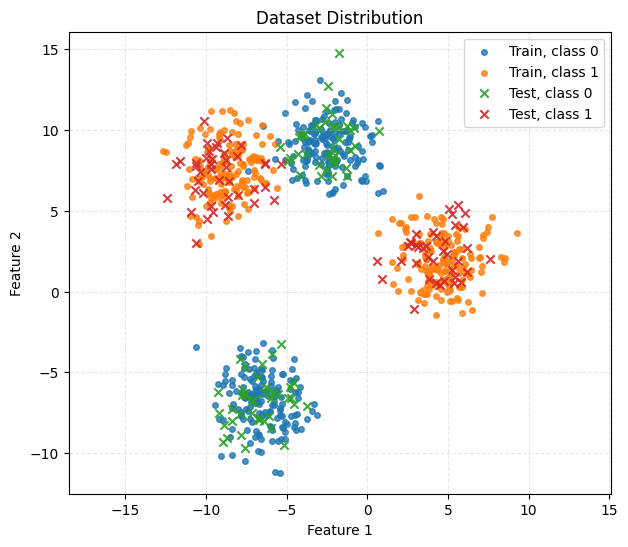

Training data:
Loss: 0.10681042820215225, test accuracy: 0.975
Testing data:
Loss: 0.10513584315776825, test accuracy: 0.962


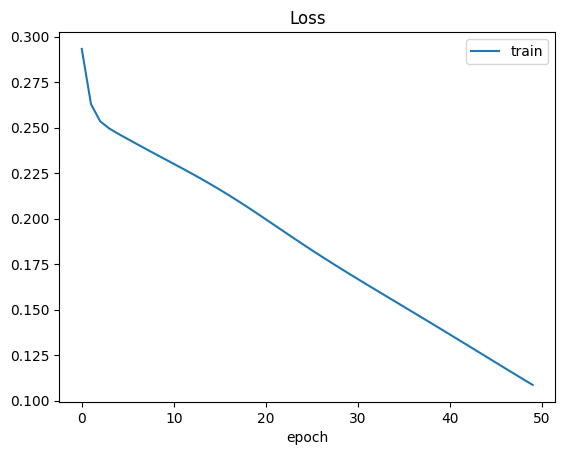

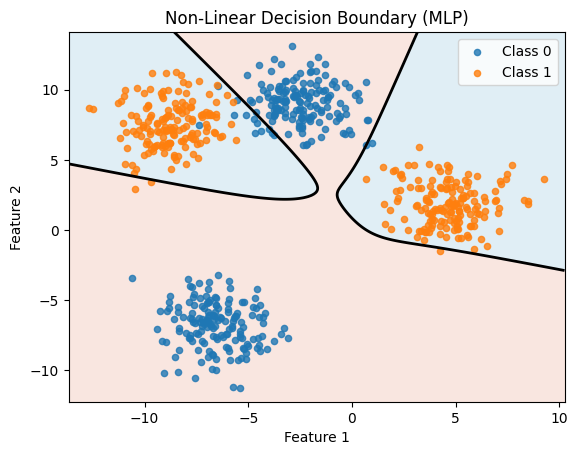

In [14]:
# Data Generation

# We use the same complex dataset (4 centers merged into 2 classes)
X, y = make_blobs(n_samples=800, centers=4, n_features=2,
cluster_std=1.5, random_state=SEED)

y[y == 2] = 0
y[y == 3] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)

plt.figure(figsize=(7, 6))
# train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train, class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train, class 1')

# test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test, class 0')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test, class 1')
plt.title('Dataset Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


# MLP Architecture Definition

# We introduce Hidden Layers to capture non-linear patterns
model = keras.Sequential([
layers.Input(shape=(2,)),
layers.Dense(8, activation='sigmoid'),
layers.Dense(8, activation='sigmoid'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
loss='mse', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)


# Evaluation & Visualization

print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Decision Boundary Visualization

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
np.linspace(x_min, x_max, 300),
np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points, verbose=0)
Z = Z.reshape(xx.shape)

# Probability regions
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='RdBu')

# Decision boundary line (probability = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Scatter plot
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20,
alpha=0.8, label='Class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20,
alpha=0.8, label='Class 1')
plt.title("Non-Linear Decision Boundary (MLP)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



## 4. Hyperparameter Tuning & Optimization

In this section, we systematically analyze how different hyperparameters affect the model's performance on the non-linear dataset. We test variations in:
* **Learning Rate** (Speed of convergence)
* **Training Duration** (Epochs & Early Stopping)
* **Activation Functions** (Sigmoid vs. ReLU)
* **Optimizers** (SGD vs. Adam)
* **Loss Functions** (MSE vs. Binary Crossentropy)

The goal is to find the optimal configuration that minimizes loss while avoiding overfitting.

In [15]:
# Data Setup (Complex Dataset)

# We ensure we are working on the same complex dataset
# (Code reused from previous step to ensure context independence)
X, y = make_blobs(n_samples=800, centers=4, n_features=2,
                  cluster_std=1.5, random_state=SEED)
y[y == 2] = 0
y[y == 3] = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

# Helper Function for Experiments
def run_experiment(name, learning_rate=0.1, epochs=150,
                   activation='sigmoid', optimizer_name='sgd',
                   loss_name='mse'):
    """
    Builds, trains, and evaluates a model with specific hyperparameters.
    """
    # 1. Architecture
    model = keras.Sequential([
        layers.Input(shape=(2,)),
        layers.Dense(8, activation=activation),
        layers.Dense(8, activation=activation),
        layers.Dense(1, activation='sigmoid') # Output is always sigmoid for binary class
    ])

    # 2. Optimizer Selection
    if optimizer_name.lower() == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    # 3. Compile
    model.compile(optimizer=opt, loss=loss_name, metrics=['accuracy'])

    # 4. Train with Early Stopping
    callback = EarlyStopping(
        monitor='loss', min_delta=1e-4, patience=10, restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        verbose=0,
        callbacks=[callback]
    )

    # 5. Evaluate
    loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
    epochs_run = len(history.history['loss'])

    return [name, loss_train, acc_train, loss_test, acc_test, epochs_run]

# Running Experiments

# List of configurations to test
experiments_config = [
    {'name': "Baseline (LR=0.1)",   'lr': 0.1,  'ep': 150, 'act': 'sigmoid', 'opt': 'sgd',  'loss': 'mse'},
    {'name': "Low LR (0.01)",       'lr': 0.01, 'ep': 150, 'act': 'sigmoid', 'opt': 'sgd',  'loss': 'mse'},
    {'name': "High LR (0.2)",       'lr': 0.2,  'ep': 150, 'act': 'sigmoid', 'opt': 'sgd',  'loss': 'mse'},
    {'name': "Few Epochs (50)",     'lr': 0.1,  'ep': 50,  'act': 'sigmoid', 'opt': 'sgd',  'loss': 'mse'},
    {'name': "Many Epochs (500)",   'lr': 0.1,  'ep': 500, 'act': 'sigmoid', 'opt': 'sgd',  'loss': 'mse'},
    {'name': "Activation: ReLU",    'lr': 0.1,  'ep': 150, 'act': 'relu',    'opt': 'sgd',  'loss': 'mse'},
    {'name': "Optimizer: Adam",     'lr': 0.1,  'ep': 150, 'act': 'sigmoid', 'opt': 'adam', 'loss': 'mse'},
    {'name': "Loss: Binary Cross.", 'lr': 0.1,  'ep': 150, 'act': 'sigmoid', 'opt': 'sgd',  'loss': 'binary_crossentropy'},
]

results = []

print("Running experiments...")
for conf in experiments_config:
    print(f" > Testing: {conf['name']}...")
    res = run_experiment(
        name=conf['name'],
        learning_rate=conf['lr'],
        epochs=conf['ep'],
        activation=conf['act'],
        optimizer_name=conf['opt'],
        loss_name=conf['loss']
    )
    results.append(res)

# Results Compilation

df = pd.DataFrame(results, columns=[
    'Experiment',
    'Train Loss', 'Train Acc',
    'Test Loss', 'Test Acc',
    'Epochs Run'
])

# Displaying the dataframe cleanly
# (In Jupyter, just 'df' at the end of cell renders a nice table)
df

Running experiments...
 > Testing: Baseline (LR=0.1)...
 > Testing: Low LR (0.01)...
 > Testing: High LR (0.2)...
 > Testing: Few Epochs (50)...
 > Testing: Many Epochs (500)...
 > Testing: Activation: ReLU...
 > Testing: Optimizer: Adam...
 > Testing: Loss: Binary Cross....


,Experiment,Train Loss,Train Acc,Test Loss,Test Acc,Epochs Run
0,Baseline (LR=0.1),0.127670,0.757812,0.129151,0.76875,150
1,Low LR (0.01),0.210877,0.742188,0.209546,0.74375,150
2,High LR (0.2),0.008624,0.989062,0.005362,1.00000,150
3,Few Epochs (50),0.140151,0.596875,0.141475,0.56875,50
4,Many Epochs (500),0.127062,0.710938,0.128530,0.70625,238
5,Activation: ReLU,0.007009,0.990625,0.003040,1.00000,81
6,Optimizer: Adam,0.012658,0.984375,0.011085,0.97500,15
7,Loss: Binary Cross.,0.033111,0.990625,0.019153,1.00000,150


## Medical Diagnosis Classification (Diabetes Dataset)

In this section, we apply Deep Learning to a real-world medical dataset (**Pima Indians Diabetes**). The goal is to predict whether a patient has diabetes based on diagnostic measures (e.g., glucose level, BMI, age).

**Key objectives:**
* **Data preprocessing:** Using `StandardScaler` to normalize features (crucial for neural networks).
* **Hyperparameter comparison:** Testing different optimizers (SGD vs. Adam), activation functions (ReLU vs. Tanh), and network depths.
* **Metrics:** Analyzing **Precision** and **Recall**, which are vital in medical diagnostics to minimize false negatives.

Starting experiments...

Experiment Results:


,Experiment,Train Loss,Train Acc,Test Loss,Test Acc,Precision,Recall,Epochs
0,"Base (SGD, LR=0.01)",0.403094,0.798046,0.569687,0.727273,0.610169,0.654545,200
1,Optimizer: Adam,0.362998,0.833876,0.604085,0.759740,0.655172,0.690909,200
2,Deep Network (3 layers),0.068493,0.990228,1.536009,0.720779,0.603448,0.636364,200
3,Activation: Tanh,0.357050,0.843648,0.603590,0.720779,0.603448,0.636364,200


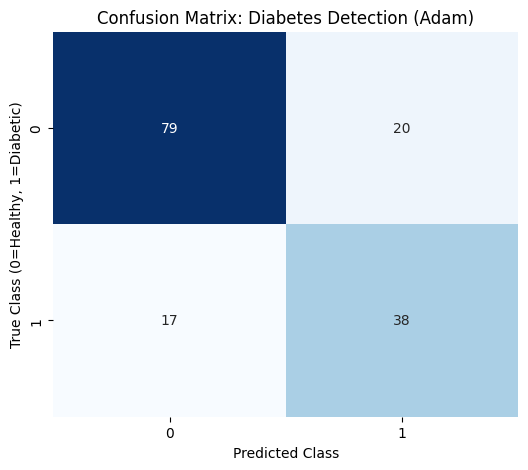

In [16]:
# Data Loading & Preprocessing

url = 'https://marcingabryel.pl/ai/pid.csv'
try:
    df = pd.read_csv(url)
except:
    print("Error: Could not download the dataset. Check internet connection.")

# Split into Features (X) and Target (y)
X = df.iloc[:, :-1].values
y = df['class'].values

# Train/Test Split
# Reusing the global SEED for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

# DATA SCALING
# Crucial for neural networks convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Experiment Logic (Refactored)

results_data = []

def train_and_evaluate(name, optimizer, activation='relu', hidden_layers=[12, 8]):
    """
    Builds, trains and evaluates a model with specific hyperparameters.
    """
    # 1. Architecture Design
    model = keras.Sequential()
    model.add(layers.Input(shape=(8,))) # 8 input features

    # Dynamic hidden layers
    for neurons in hidden_layers:
        model.add(layers.Dense(neurons, activation=activation))

    # Output layer (Binary Classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    # 2. Compilation
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # 3. Training with Early Stopping
    callback = EarlyStopping(
        monitor='loss', patience=10, restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=16,
        verbose=0,
        callbacks=[callback]
    )

    # 4. Evaluation
    loss_tr, acc_tr = model.evaluate(X_train, y_train, verbose=0)
    loss_te, acc_te = model.evaluate(X_test, y_test, verbose=0)
    epochs_count = len(history.history['loss'])

    # Metrics
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    results_data.append([name, loss_tr, acc_tr, loss_te, acc_te, prec, rec, epochs_count])

    return model, y_pred

# Running Experiments

print("Starting experiments...")

# --- Experiment 1: Baseline (SGD, 2 Hidden Layers) ---
_, _ = train_and_evaluate(
    "Base (SGD, LR=0.01)",
    keras.optimizers.SGD(learning_rate=0.01)
)

# --- Experiment 2: Optimizer Adam (Best Model Candidate) ---
# We store this model's predictions for the confusion matrix
best_model, y_pred_best = train_and_evaluate(
    "Optimizer: Adam",
    keras.optimizers.Adam(learning_rate=0.001)
)

# --- Experiment 3: Deeper Network (3 Layers) ---
_, _ = train_and_evaluate(
    "Deep Network (3 layers)",
    keras.optimizers.Adam(learning_rate=0.001),
    hidden_layers=[32, 16, 8]
)

# --- Experiment 4: Activation Tanh ---
_, _ = train_and_evaluate(
    "Activation: Tanh",
    keras.optimizers.Adam(learning_rate=0.001),
    activation='tanh'
)

# Results & Visualization

df_results = pd.DataFrame(results_data, columns=[
    'Experiment', 'Train Loss', 'Train Acc',
    'Test Loss', 'Test Acc', 'Precision', 'Recall', 'Epochs'
])

print("\nExperiment Results:")
try:
    display(df_results)
except NameError:
    print(df_results)

# Confusion Matrix for the best model (Adam)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Diabetes Detection (Adam)')
plt.ylabel('True Class (0=Healthy, 1=Diabetic)')
plt.xlabel('Predicted Class')
plt.show()

## Breast Cancer Classification (UCI Repository)

In this final experiment, we analyze the **Breast Cancer Wisconsin (Diagnostic) Data Set**. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

**Objective:** Train a neural network to classify tumors as **Malignant** (0) or **Benign** (1).

We compare three architectures:
1.  **Small Network:** Minimalist architecture (16 neurons) to check for underfitting.
2.  **Large Network:** Deeper architecture (64->32 neurons) to capture complex patterns.
3.  **SGD Optimization:** Testing classic Stochastic Gradient Descent against Adam.

Dataset loaded. Features: 30, Samples: 569
Class labels: 0 = Malignant, 1 = Benign
Running Breast Cancer classification experiments...

Experiment Results (Breast Cancer):


,Experiment,Train Loss,Train Acc,Test Loss,Test Acc,Epochs
0,Small Network (1 hidden),0.028841,0.993407,0.062898,0.973684,100
1,Large Network (2 hidden),0.000556,1.000000,0.129798,0.973684,100
2,SGD Optimizer (LR=0.1),0.022291,0.993407,0.067821,0.982456,100


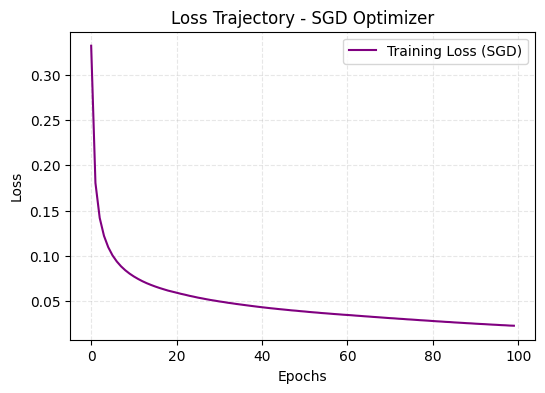

In [17]:
# Data Loading & Preprocessing

# We use the sklearn wrapper for the UCI Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dataset loaded. Features: {X.shape[1]}, Samples: {X.shape[0]}")
print("Class labels: 0 = Malignant, 1 = Benign")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# DATA SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Experiment Logic

results_uci = []

def run_cancer_experiment(name, model, optimizer='adam'):
    """
    Trains and evaluates a model on the Cancer dataset.
    """
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Training
    callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        verbose=0,
        callbacks=[callback]
    )

    # Evaluation
    loss_tr, acc_tr = model.evaluate(X_train, y_train, verbose=0)
    loss_te, acc_te = model.evaluate(X_test, y_test, verbose=0)
    epochs_run = len(history.history['loss'])

    results_uci.append([name, loss_tr, acc_tr, loss_te, acc_te, epochs_run])
    return history

print("Running Breast Cancer classification experiments...")

# --- Experiment 1: Small Network ---
model_small = keras.Sequential([
    layers.Input(shape=(30,)), # 30 features
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
run_cancer_experiment("Small Network (1 hidden)", model_small)

# --- Experiment 2: Large Network ---
model_large = keras.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
run_cancer_experiment("Large Network (2 hidden)", model_large)

# --- Experiment 3: SGD Optimizer ---
model_sgd = keras.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# Saving history for the plot
history_sgd = run_cancer_experiment(
    "SGD Optimizer (LR=0.1)",
    model_sgd,
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)

# Results & Visualization

df_uci = pd.DataFrame(results_uci, columns=[
    'Experiment', 'Train Loss', 'Train Acc',
    'Test Loss', 'Test Acc', 'Epochs'
])

print("\nExperiment Results (Breast Cancer):")
try:
    display(df_uci)
except NameError:
    print(df_uci)

# Plotting Loss for the SGD model (to observe convergence)
plt.figure(figsize=(6, 4))
plt.plot(history_sgd.history['loss'], label='Training Loss (SGD)', color='purple')
plt.title('Loss Trajectory - SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()